Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. \
Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis.

In [1]:
# import libraries
import pandas as pd
import numpy as np
from numpy import array
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# uploading dataset
from google.colab import files
uploaded = files.upload()

Saving Company_Data.csv to Company_Data.csv


In [4]:
company_df=pd.read_csv("Company_Data.csv")
company_df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


# **EDA**

In [5]:
company_df.shape

(400, 11)

In [6]:
company_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [7]:
company_df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [8]:
# cheching for duplicates
company_df[company_df.duplicated()]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US


In [9]:
company_df['ShelveLoc'].value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

In [10]:
company_df['ShelveLoc']=company_df['ShelveLoc'].map({'Good':1,'Medium':2,'Bad':3})

In [11]:
company_df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,3,42,17,Yes,Yes
1,11.22,111,48,16,260,83,1,65,10,Yes,Yes
2,10.06,113,35,10,269,80,2,59,12,Yes,Yes
3,7.40,117,100,4,466,97,2,55,14,Yes,Yes
4,4.15,141,64,3,340,128,3,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,Yes,Yes
396,6.14,139,23,3,37,120,2,55,11,No,Yes
397,7.41,162,26,12,368,159,2,40,18,Yes,Yes
398,5.94,100,79,7,284,95,3,50,12,Yes,Yes


In [12]:
company_df['ShelveLoc'].value_counts()

2    219
3     96
1     85
Name: ShelveLoc, dtype: int64

In [13]:
label_encoder = preprocessing.LabelEncoder()
company_df['Urban']= label_encoder.fit_transform(company_df['Urban'])
company_df['US']= label_encoder.fit_transform(company_df['US'])

In [14]:
company_df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,3,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,3,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,3,50,12,1,1


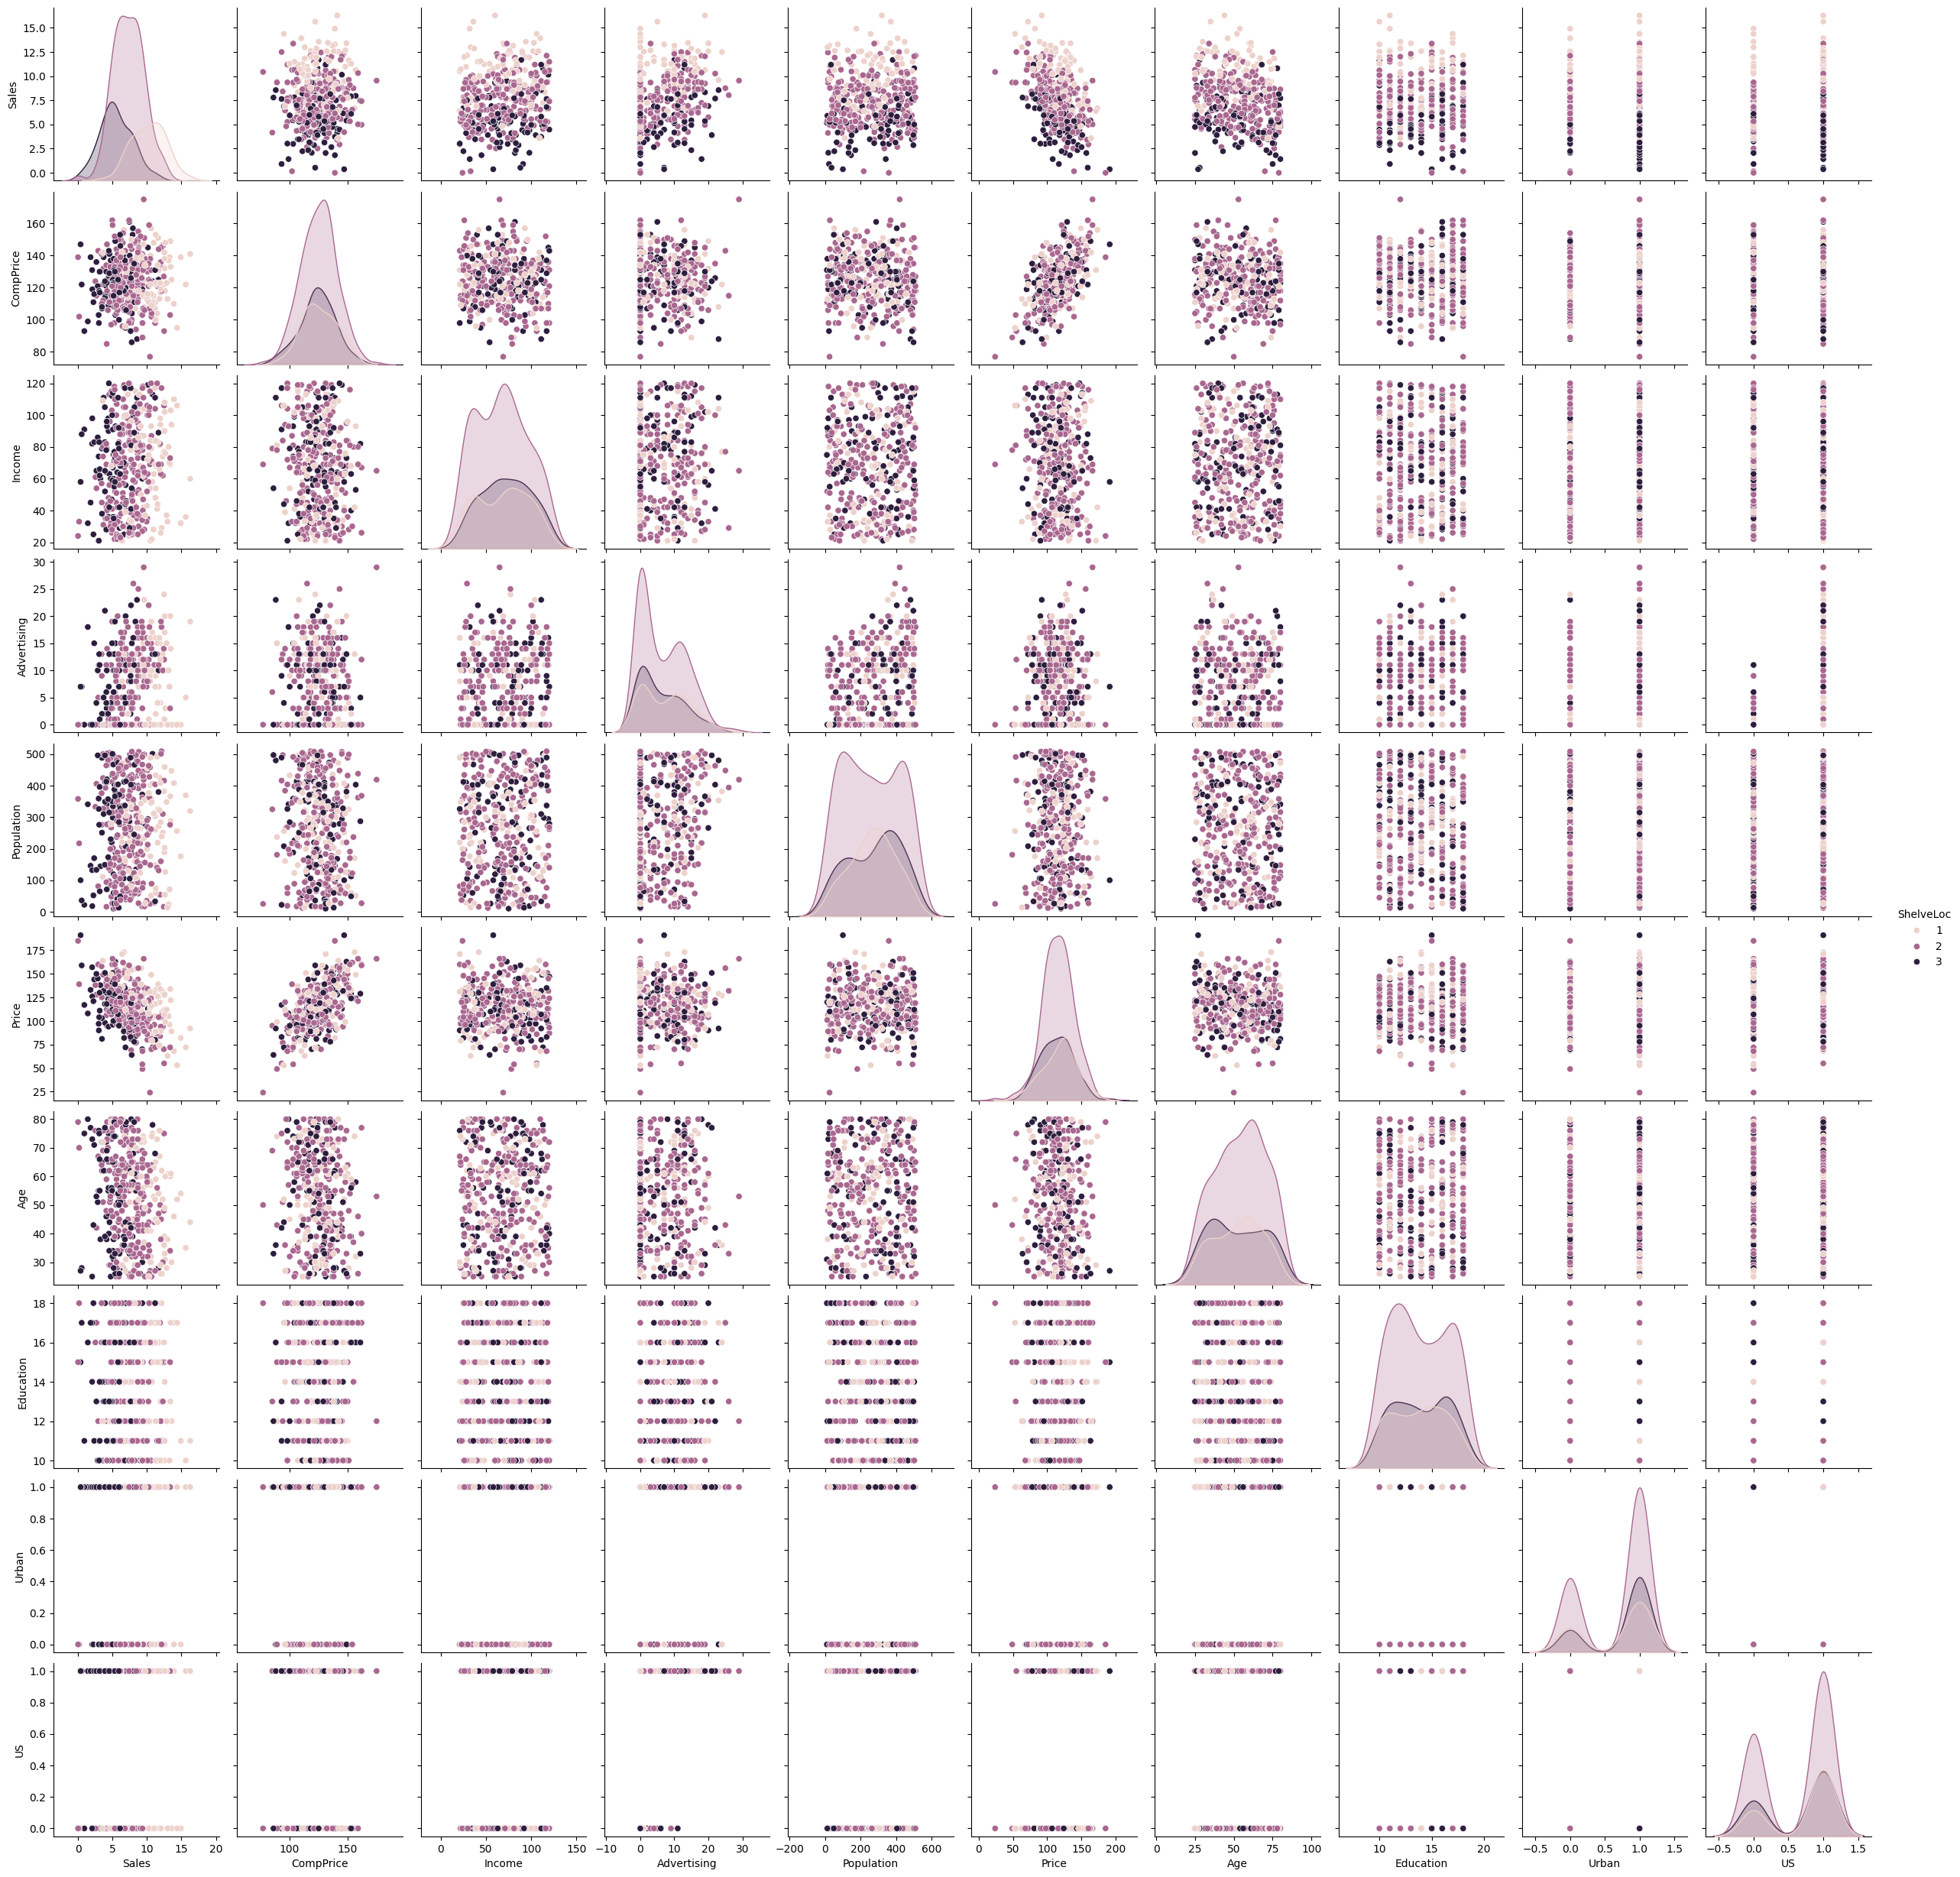

In [15]:
import seaborn as sns
sns.pairplot(data=company_df, hue = 'ShelveLoc')

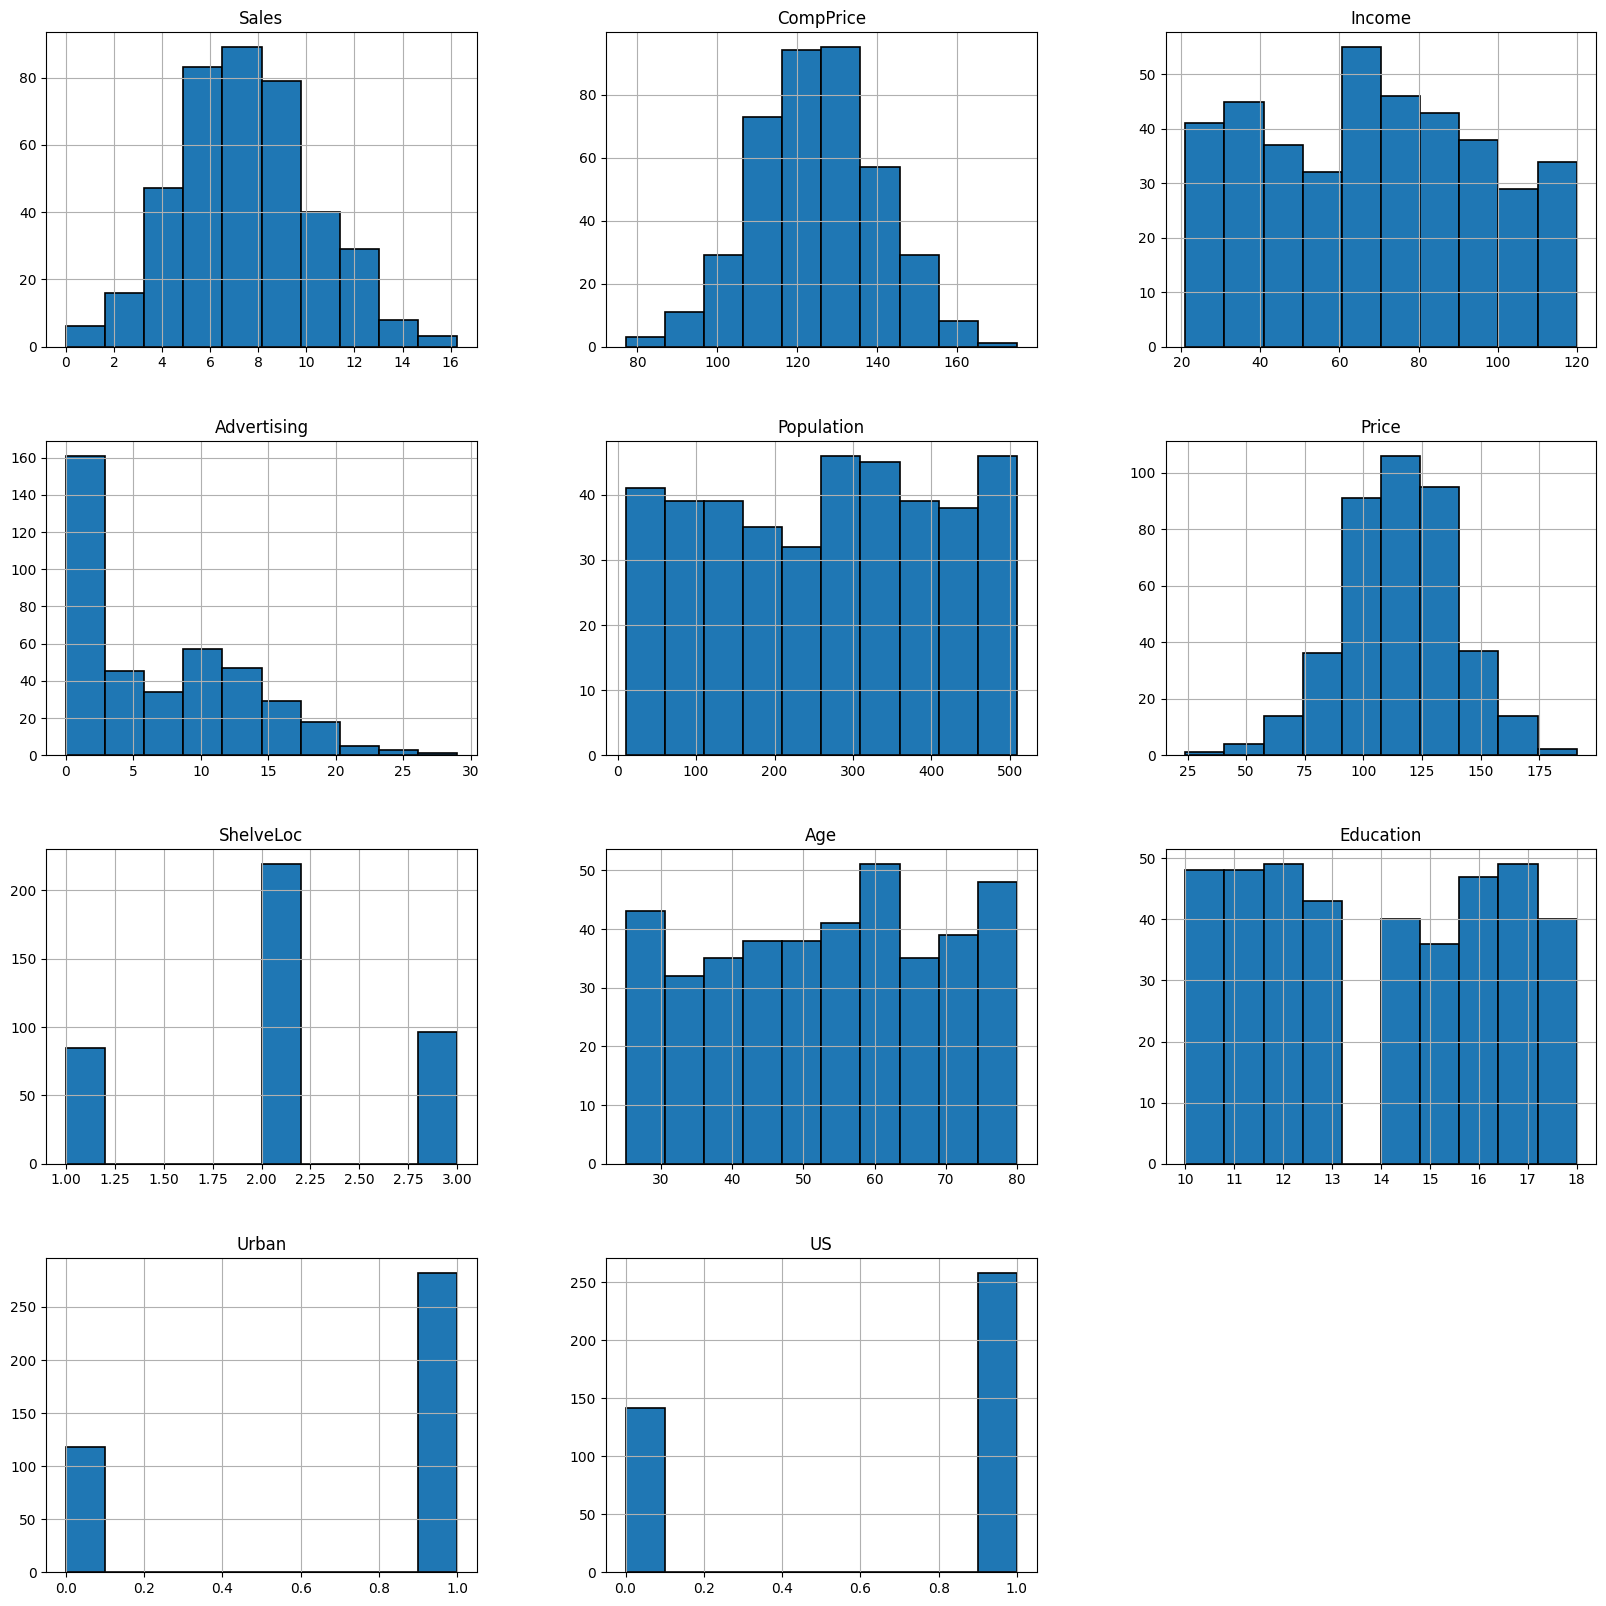

In [21]:
company_df.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

<Axes: >

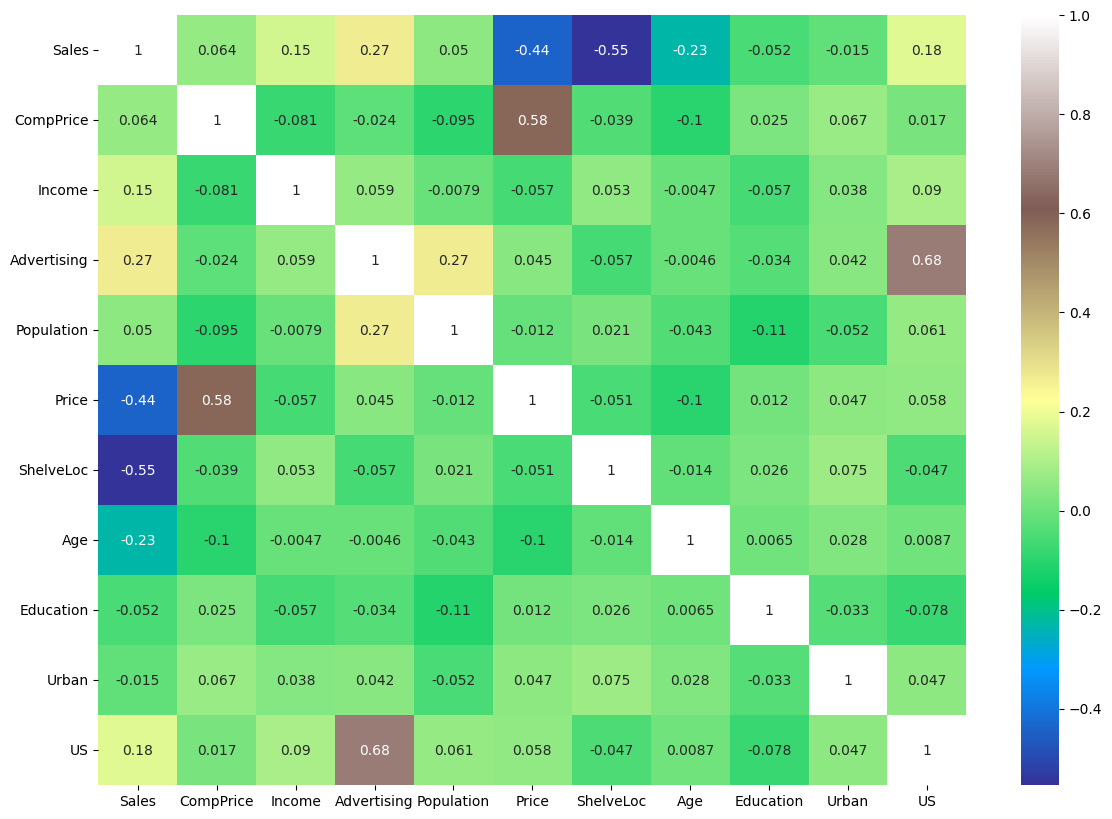

In [22]:
plt.figure(figsize=(14,10))
import seaborn as sns
sns.heatmap(company_df.corr(),annot=True,cmap='terrain')

In [16]:
x=company_df.iloc[:, list(range(0, 6)) + list(range(7, 11))]
y=company_df['ShelveLoc']

In [17]:
x

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US
0,9.50,138,73,11,276,120,42,17,1,1
1,11.22,111,48,16,260,83,65,10,1,1
2,10.06,113,35,10,269,80,59,12,1,1
3,7.40,117,100,4,466,97,55,14,1,1
4,4.15,141,64,3,340,128,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,1,1
396,6.14,139,23,3,37,120,55,11,0,1
397,7.41,162,26,12,368,159,40,18,1,1
398,5.94,100,79,7,284,95,50,12,1,1


In [18]:
# Normalization function
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [19]:
x = norm_func(x.iloc[:,0:])
x

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US
0,0.583897,0.622449,0.525253,0.379310,0.533066,0.574850,0.309091,0.875,1.0,1.0
1,0.689613,0.346939,0.272727,0.551724,0.501002,0.353293,0.727273,0.000,1.0,1.0
2,0.618316,0.367347,0.141414,0.344828,0.519038,0.335329,0.618182,0.250,1.0,1.0
3,0.454825,0.408163,0.797980,0.137931,0.913828,0.437126,0.545455,0.500,1.0,1.0
4,0.255071,0.653061,0.434343,0.103448,0.661323,0.622754,0.236364,0.375,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
395,0.772588,0.622449,0.878788,0.586207,0.386774,0.622754,0.145455,0.500,1.0,1.0
396,0.377382,0.632653,0.020202,0.103448,0.054108,0.574850,0.545455,0.125,0.0,1.0
397,0.455439,0.867347,0.050505,0.413793,0.717435,0.808383,0.272727,1.000,1.0,1.0
398,0.365089,0.234694,0.585859,0.241379,0.549098,0.425150,0.454545,0.250,1.0,1.0


In [20]:
y

0      3
1      1
2      2
3      2
4      3
      ..
395    1
396    2
397    2
398    3
399    1
Name: ShelveLoc, Length: 400, dtype: int64

# **Model building using Random forest**

In [23]:
num_trees = 100
max_features = 3
kfold = KFold(n_splits=10, random_state=7, shuffle=True)

In [24]:
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, x, y, cv=kfold)

In [25]:
results

array([0.65 , 0.725, 0.725, 0.6  , 0.725, 0.625, 0.55 , 0.65 , 0.75 ,
       0.6  ])

In [26]:
print(results.mean())

0.6599999999999999


# **Bagged Decision Trees for Classification**

In [27]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
kfold = KFold(n_splits=10, random_state=7, shuffle=True) # evaluation method
cart = DecisionTreeClassifier()
num_trees = 100

In [28]:
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=7) #Classifier
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

0.6649999999999999


# **AdaBoost Classification**

In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
num_trees = 10
seed=7
kfold = KFold(n_splits=10, random_state=seed,shuffle=True)

In [30]:
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

0.6624999999999999
